In [ ]:
import cv2
import math

count = 0
videoFile = "/content/drive/MyDrive/24-1 인공지능/080228-master/실습10_자료/Tom and Jerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)  # frame rate
x=1
while(cap.isOpened()):
  frameId = cap.get(1)  # current frame number
  ret, frame = cap.read()
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename ="frame%d.jpg" % count;count+=1
    cv2.imwrite(filename, frame)
cap.release()
print("Done!")

Done!


In [ ]:
import cv2
import math

count = 0
videoFile = "/content/drive/MyDrive/24-1 인공지능/080228-master/실습10_자료/Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)  # frame rate
x=1
while(cap.isOpened()):
  frameId = cap.get(1)  # current frame number
  ret, frame = cap.read()
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename ="test%d.jpg" % count;count+=1
    cv2.imwrite(filename, frame)
cap.release()
print("Done!")

Done!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

data = pd.read_csv('/content/drive/MyDrive/24-1 인공지능/080228-master/실습10_자료/mapping.csv')
test = pd.read_csv('/content/drive/MyDrive/24-1 인공지능/080228-master/실습10_자료/testing.csv')

X = []
for img_name in data.Image_ID:
  img = plt.imread('' + img_name)
  X.append(img)
X = np.array(X)

test_image = []
for img_name in test.Image_ID:
 img = plt.imread('' + img_name)
 test_image.append(img)
test_img = np.array(test_image)

from keras.utils import to_categorical
train_y = to_categorical(data.Class)
test_y = to_categorical(test.Class)

image = []
for i in range(0,X.shape[0]):
 a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
 image.append(a)
X = np.array(image)

test_image = []
for i in range(0,test_img.shape[0]):
 a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
 test_image.append(a)
test_image = np.array(test_image)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 전이학습
transfer_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
transfer_model.trainable = False
transfer_model.summary()

model = Sequential()
model.add(transfer_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# patience=10으로 early stopping 적용
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data= (X_valid, y_valid), callbacks=[checkpoint, early_stopping_callback])

print("Done2")

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

6/6 [==============================] - 1s 143ms/step - loss: 1.0863 - accuracy: 0.6290
Real Test accuracy: 62.90%
6/6 [==============================] - 1s 136ms/step
The screen time of None is  17 seconds
The screen time of Jerry is  18 seconds
The screen time of Tom is  151 seconds


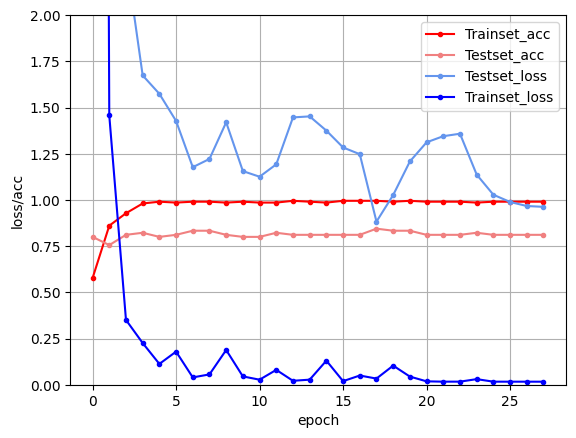

In [ ]:
scores = model.evaluate(test_image, test_y)
print("Real Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = np.argmax(model.predict(test_image), axis=-1)
print("The screen time of None is ", predictions[predictions==0].shape[0], "seconds")
print("The screen time of Jerry is ", predictions[predictions==1].shape[0], "seconds")
print("The screen time of Tom is ", predictions[predictions==2].shape[0], "seconds")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.ylim(0.0, 2.0)
plt.show()